<a href="https://colab.research.google.com/github/zilavalencia/ChungaraVZila-IA-SIS420/blob/main/Laboratorios/Laboratorio03/AprendizajenoSupervisado_Punto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO 5

PUNTO 3

INTEGRANTES:

Daniela Portillo Mercado

Jaime Nina Vargas

Zila Chungara Valencia

Link dataset: https://archive.ics.uci.edu/dataset/81/pen%2Bbased%2Brecognition%2Bof%2Bhandwritten%2Bdigits?utm_source=chatgpt.com

# DBSCAN y GAUSSIAN MIXTURES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LogNorm
from sklearn.mixture import BayesianGaussianMixture

## 1. Dataset Pen-Based Recognition of Handwritten Digits

El Pen-Based Recognition of Handwritten Digits es un conjunto de datos tabular diseñado para clasificación de dígitos manuscritos. Contiene 10 992 muestras (7 494 de entrenamiento y 2 798 de prueba) y 16 atributos enteros que describen las coordenadas de ocho puntos de la trayectoria del trazo de un lápiz, más una columna de etiqueta con el dígito (0–9).

- Instancias totales: 10 992 (7 494 para entrenamiento, 2 798 para prueba)
- Número de atributos: 16 variables de entrada + 1 clase
- Tipo de datos: Enteros en el rango 0–100, sin valores perdidos
- Descripción: Cada muestra registra las coordenadas (x,y) de ocho puntos muestreados uniformemente (cada 100 ms) de un trazo manuscrito en una tableta de 500×500 píxeles, normalizadas a un rango 0–100. La presión del lápiz se ignora
- Clases: Dígitos del 0 al 9 (10 clases)

In [ ]:
# 1) Definir lista de nombres de columna
column_names = [
    'x1','y1','x2','y2','x3','y3','x4','y4',
    'x5','y5','x6','y6','x7','y7','x8','y8',
    'Digito'
]

# Rutas a archivos de entrenamiento y prueba
train_path = r"D:/Materias/SIS420 - Inteligencia Artificial/Datasets/Pen-Based Recognition of Handwritten Digits/pendigits.tra"
test_path  = r"D:/Materias/SIS420 - Inteligencia Artificial/Datasets/Pen-Based Recognition of Handwritten Digits/pendigits.tes"

df_train = pd.read_csv(train_path, header=None)
df_test  = pd.read_csv(test_path,  header=None)
df_full  = pd.concat([df_train, df_test], ignore_index=True)

# 3) Separar características y etiquetas
X = df_full.iloc[:, :16].values
y = df_full.iloc[:, 16].values
print("Total muestras:", X.shape)

Total muestras: (10992, 16)


### 1.1. Escalado de características

Es crucial normalizar o estandarizar antes de calcular distancias

In [ ]:
# Estandarizar X_train para que media=0 y varianza=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. DBSCAN

In [ ]:
# Configuración 1: eps=0.5, min_samples=5
dbscan1 = DBSCAN(eps=0.5, min_samples=10).fit(X_scaled)
print("Etiquetas únicas DBSCAN eps=0.5:", np.unique(dbscan1.labels_))

# Configuración 2: eps=1.0, min_samples=5
dbscan2 = DBSCAN(eps=1.0, min_samples=10).fit(X_scaled)
print("Etiquetas únicas DBSCAN eps=1.0:", np.unique(dbscan2.labels_))

Etiquetas únicas DBSCAN eps=0.5: [-1  0  1  2  3  4  5  6  7]
Etiquetas únicas DBSCAN eps=1.0: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


### PCA - Reducción a 2D para visualización

In [ ]:
# Reducir a 2 componentes para plot_dbscan
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask     = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask  = ~(core_mask | anomalies_mask)

    # Núcleos: usar components_ en lugar de X
    cores      = dbscan.components_
    anomalies  = X[anomalies_mask]
    non_cores  = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask],
                marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1],
                marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}", fontsize=14)


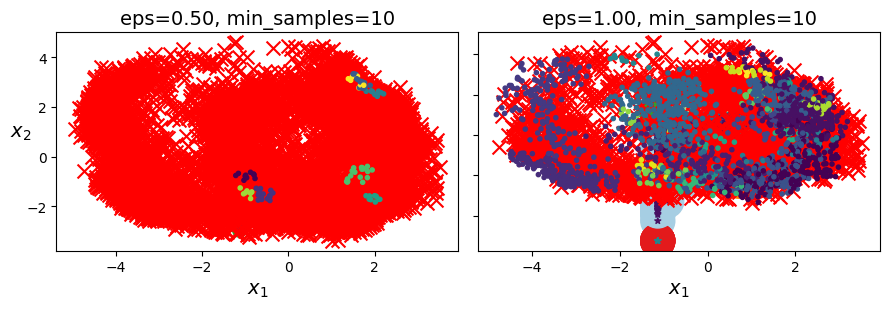

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan1, X_pca, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_pca, size=600, show_ylabels=False)

plt.tight_layout()
plt.show()

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### Extensión con K-NN en el espacio PCA

In [ ]:
# Tomar el último dbscan entrenado (dbscan2) y los datos PCA
db = dbscan2  # DBSCAN entrenado en X_scaled

# Índices de muestras núcleo
core_indices = db.core_sample_indices_
# Coordenadas PCA de los núcleos
db_cores_pca = X_pca[core_indices]
# Etiquetas correspondientes
y_cores = db.labels_[core_indices]

# Entrenar K-NN en espacio PCA (2D)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(db_cores_pca, y_cores)

# Definir nuevos puntos directamente en coordenadas PCA (2D)
X_new_pca = np.array([
    [0.5, -0.5],
    [-0.2, 0.3],
    [1.0, 1.0],
    [-1.0, -1.0]
])  # Ejemplos en PCA1/PCA2

# Predecir etiquetas y probabilidades
pred_labels = knn.predict(X_new_pca)
pred_proba = knn.predict_proba(X_new_pca)


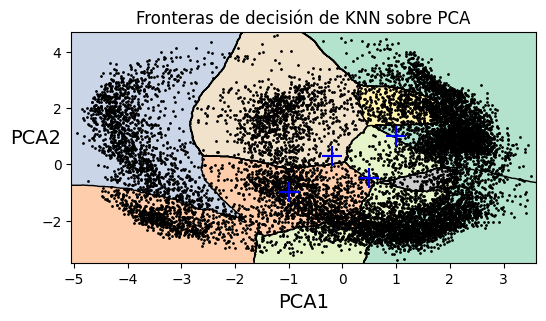

In [ ]:
# 4) Visualizar fronteras de decisión (adaptado a PCA)
plt.figure(figsize=(6, 3))
# Usamos tu función plot_decision_boundaries sobre PCA
plot_decision_boundaries(knn, X_pca, show_centroids=False)
plt.scatter(
    X_new_pca[:, 0], X_new_pca[:, 1],
    c="b", marker="+", s=200, zorder=10
)
plt.title("Fronteras de decisión de KNN sobre PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

## 3. GAUSSIAN MIXTURES

Los modelos de Gaussian Mixtures son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

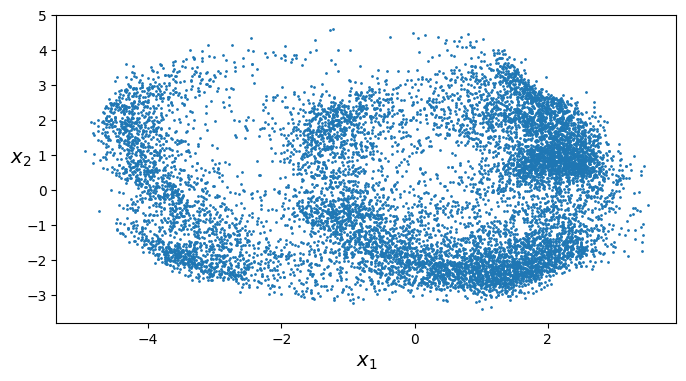

In [ ]:
# Ajustamos GMM con 10 componentes (uno por dígito) sobre X_pca (2D para visualización)
gm = GaussianMixture(n_components=10, n_init=10, random_state=42)
gm.fit(X_pca)

def plot_clusters(X_pca, y=None):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X_pca)
plt.show()

GMM etiquetas únicas: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


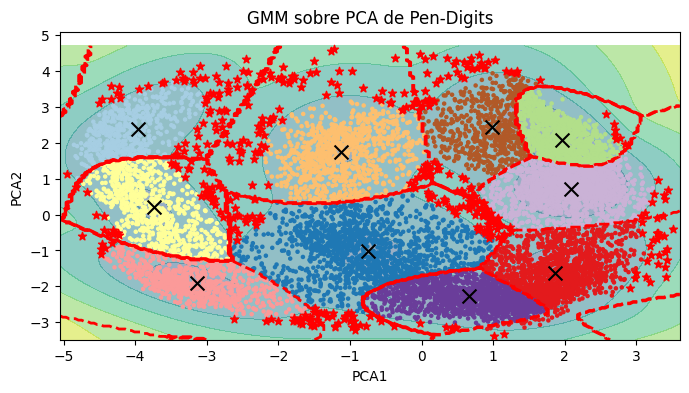

In [ ]:
labels_gm = gm.predict(X_pca)
print("GMM etiquetas únicas:", set(labels_gm))

# Función plot_gaussian_mixture adaptada a espacio PCA
def plot_gaussian_mixture_pca(clusterer, X_plot, resolution=200, show_ylabels=True):
    mins = X_plot.min(axis=0) - 0.1
    maxs = X_plot.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution)
    )
    # Contorno de densidad negativa (log norm)
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12),
                 alpha=0.5)
    # Frontera de las componentes
    Z_labels = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z_labels,
                linewidths=2, colors='r', linestyles='dashed')
    # Puntos proyectados
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=labels_gm, s=5, cmap='Paired')
    # Centroides en PCA
    centroids = gm.means_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='k')

    plt.xlabel('PCA1')
    if show_ylabels:
        plt.ylabel('PCA2')
    else:
        plt.tick_params(labelleft=False)

# Definiendo un valor límite podemos detectar anomalías en los datos.
densities = gm.score_samples(X_pca)
density_threshold = np.percentile(densities, 4)
anomalies = X_pca[densities < density_threshold]

# Mostrar GMM sobre PCA
plt.figure(figsize=(8, 4))
plot_gaussian_mixture_pca(gm, X_pca)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.title('GMM sobre PCA de Pen-Digits')
plt.show()

### 3.1 Bayesian Gaussian Mixture (BGM)

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de Bayesian Gaussian Mixtures, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

d:\Materias\SIS420 - Inteligencia Artificial\Examenes\Examen 1er Parcial\.venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Pesos del BGM: [0.06 0.04 0.15 0.07 0.1  0.06 0.12 0.03 0.06 0.05 0.03 0.05 0.09 0.06
 0.02]


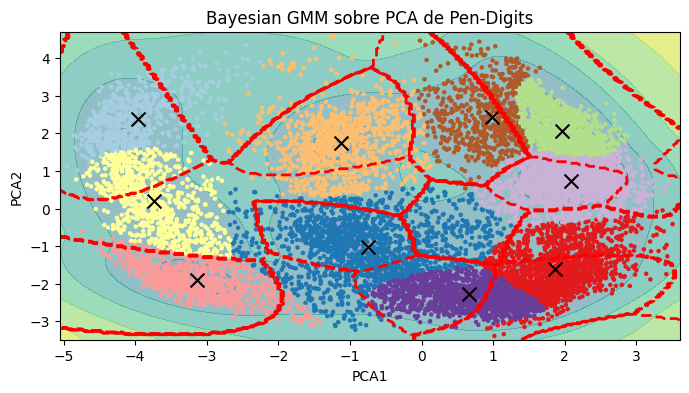

In [ ]:
# Ajustamos BGM con componentes iniciales suficientes; los irrelevantes recibirán peso ~0
bgm = BayesianGaussianMixture(n_components=15, n_init=10, random_state=42)
bgm.fit(X_pca)

# Mostrar pesos de mezcla
weights = np.round(bgm.weights_, 2)
print('Pesos del BGM:', weights)


# Visualización de Bayesian GMM sobre PCA
plt.figure(figsize=(8,4))
plot_gaussian_mixture_pca(bgm, X_pca)
plt.title('Bayesian GMM sobre PCA de Pen-Digits')
plt.show()